<a href="https://colab.research.google.com/github/MIRELA-CR/RidgeRegression/blob/main/RidgeRegression_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas import read_csv
from numpy import arange, sqrt
from tabulate import tabulate

from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
filename = "/content/drive/MyDrive/Colab Notebooks/whitewines.csv"
dataset = read_csv(filename)

In [ ]:
data = dataset.values

wine_train = dataset[0:3750]
wine_test = dataset[3750:4898]

array1 = wine_train.values
X = array1[:,0:11]
y = array1[:,11]

array2 = wine_test.values
X_t = array2[:,0:11]
y_t = array2[:,11]

In [ ]:
table_csv  = tabulate(dataset.head(11), headers='keys',tablefmt='fancy_grid')
print(table_csv)

╒════╤═════════════════╤════════════════════╤═══════════════╤══════════════════╤═════════════╤═══════════════════════╤════════════════════════╤═══════════╤══════╤═════════════╤═══════════╤═══════════╕
│    │   fixed acidity │   volatile acidity │   citric acid │   residual sugar │   chlorides │   free sulfur dioxide │   total sulfur dioxide │   density │   pH │   sulphates │   alcohol │   quality │
╞════╪═════════════════╪════════════════════╪═══════════════╪══════════════════╪═════════════╪═══════════════════════╪════════════════════════╪═══════════╪══════╪═════════════╪═══════════╪═══════════╡
│  0 │             6.7 │               0.62 │          0.24 │             1.1  │       0.039 │                     6 │                     62 │   0.9934  │ 3.41 │        0.32 │   10.4    │         5 │
├────┼─────────────────┼────────────────────┼───────────────┼──────────────────┼─────────────┼───────────────────────┼────────────────────────┼───────────┼──────┼─────────────┼───────────┼────────

In [ ]:
cv = RepeatedKFold(n_splits=15, n_repeats=2, random_state=1)
model = RidgeCV(alphas=arange(0.1, 1, 0.05), cv=cv, scoring='neg_mean_absolute_error')

In [ ]:
model.fit(X,y)

RidgeCV(alphas=array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
        cv=RepeatedKFold(n_repeats=2, n_splits=15, random_state=1),
        scoring='neg_mean_absolute_error')

In [ ]:
y_pred = model.predict(X_t)

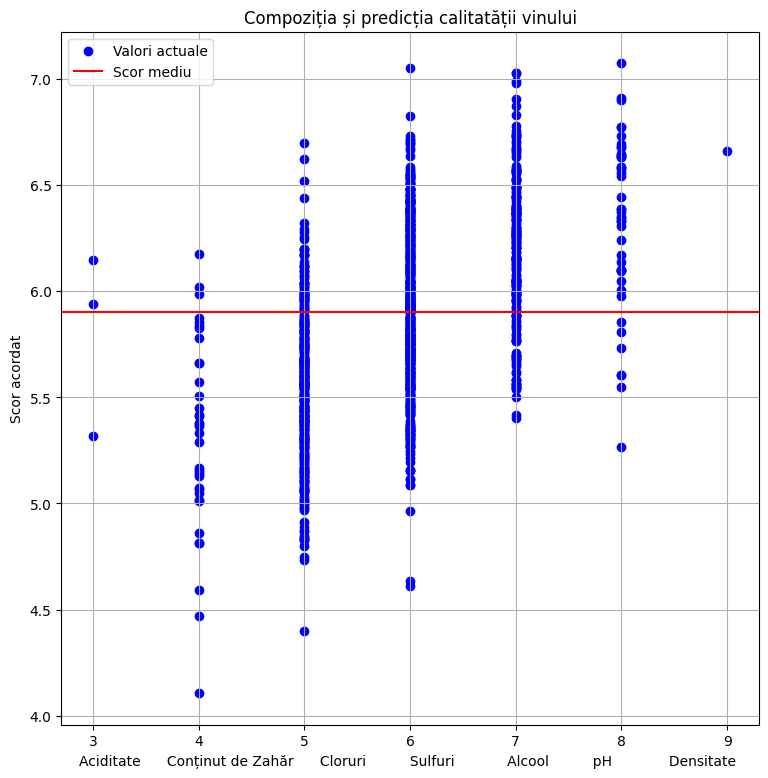

In [ ]:
plt.figure(figsize=(9, 9))

mean_y_t = np.mean(y_t)
max_index = np.argmax(y_t)
error_y_t = np.abs(y_t[max_index] - mean_y_t)

plt.scatter(y_t, y_pred, color='blue', marker='o', label='Valori actuale')
plt.axhline(y=mean_y_t, color='red', linestyle='-', label='Scor mediu')

plt.xlabel('Aciditate      Conținut de Zahăr      Cloruri          Sulfuri            Alcool          pH             Densitate ')
plt.ylabel('Scor acordat')
plt.title('Compoziția și predicția calitatății vinului')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
table_data = list(zip(y_t[:15], y_pred[:15]))
headers = ["Scor real", "Predicție"]
table = tabulate(table_data, headers, tablefmt="fancy_grid")
print(table)

╒═════════════╤═════════════╕
│   Scor real │   Predicție │
╞═════════════╪═════════════╡
│           6 │     6.48039 │
├─────────────┼─────────────┤
│           5 │     5.59928 │
├─────────────┼─────────────┤
│           6 │     6.28502 │
├─────────────┼─────────────┤
│           6 │     6.022   │
├─────────────┼─────────────┤
│           5 │     5.71321 │
├─────────────┼─────────────┤
│           7 │     6.38652 │
├─────────────┼─────────────┤
│           6 │     5.87586 │
├─────────────┼─────────────┤
│           5 │     5.30861 │
├─────────────┼─────────────┤
│           7 │     7.02406 │
├─────────────┼─────────────┤
│           6 │     6.24391 │
├─────────────┼─────────────┤
│           5 │     5.14829 │
├─────────────┼─────────────┤
│           5 │     5.57943 │
├─────────────┼─────────────┤
│           6 │     5.75631 │
├─────────────┼─────────────┤
│           7 │     5.67774 │
├─────────────┼─────────────┤
│           5 │     5.43381 │
╘═════════════╧═════════════╛


In [ ]:
print('%s: %f' % ("MSE", mean_squared_error(y_t, y_pred)))
print('%s: %f' % ("RMSE", sqrt(mean_squared_error(y_t, y_pred))))
print('%s: %f' % ("MAE", mean_absolute_error(y_t, y_pred)))
print('%s: %f' %  ("R^2", r2_score(y_t, y_pred)))

MSE: 0.540980
RMSE: 0.735514
MAE: 0.577037
R^2: 0.305846
